In [1]:
import json
import pandas as pd
import copy
import glob
import cv2
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
sys.path.append(os.path.join('./','../pyunet'))
from lib.unet import UNet
from modules.train import Train
import torch
from lib.utils import get_image, get_mask, get_predicted_img, dice_score, count_parameters
import glob
from sklearn.model_selection import train_test_split
import shutil
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
img_dir  = "./images/kvasir-capsule/images/"
mask_dir = "./images/kvasir-capsule/masks/"

tmp_dir = "./tmp"

if os.path.exists(tmp_dir):
    shutil.rmtree(tmp_dir)

train_images_dir = "./tmp/train/images/"
train_masks_dir  = "./tmp/train/masks/"

test_images_dir  = "./tmp/test/images/"
test_masks_dir   = "./tmp/test/masks/"

os.makedirs(train_images_dir)
os.makedirs(train_masks_dir)
os.makedirs(test_images_dir)
os.makedirs(test_masks_dir)

images = sorted(glob.glob("{}/*".format(img_dir)))
masks  = sorted(glob.glob("{}/*".format(mask_dir)))

train_images, test_images, train_masks, test_masks = train_test_split(
    images,
    masks,
    test_size=0.3,
    random_state=42
)

for img_file in train_images:
    shutil.copy(img_file, train_images_dir)
    
for img_file in train_masks:
    shutil.copy(img_file, train_masks_dir)
    
for img_file in test_images:
    shutil.copy(img_file, test_images_dir)
    
for img_file in test_masks:
    shutil.copy(img_file, test_masks_dir)
    
    

In [3]:
img_height     = 128
img_width      = 128
device         = 'cuda'
gpu_index      = 0
input_img_dir  = train_images_dir
input_mask_dir = train_masks_dir
model_file     = "test.pth"
epochs         = 100
learning_rate  = 1e-005
in_channels    = 3
out_channels   = 2
batch_size     = 5
loss_type      = 'CE'
model_type     = 'unet_rd'
labels         = [0, 1]

params = {
    'img_height':     img_height,
    'img_width':      img_width,
    'device':         device,
    'gpu_index':      gpu_index,
    'input_img_dir':  input_img_dir,
    'input_mask_dir': input_mask_dir,
    'epochs':         epochs,
    'learning_rate':  learning_rate,
    'in_channels':    in_channels,
    'out_channels':   out_channels,
    'loss_type':      loss_type,
    'batch_size':     batch_size,
    'model_file':     model_file,
    'test_img_dir':   test_images_dir,
    'test_mask_dir':  test_masks_dir,
    'model_type':     model_type
}

cmd = Train(params=params)

cmd.execute()

model = cmd.model

num_parameters = count_parameters(model)

print("Number of Parameters: {}".format(num_parameters))

Training model...
input_img_dir: ./tmp/train/images/
input_mask_dir: ./tmp/train/masks/
CUDA Device: NVIDIA GeForce RTX 3050 Laptop GPU
UNetRd(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): NormalizedDoubleConv(
      (first_conv): DepthwiseSeperableConv(
        (depthwise): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=1024, bias=False)
        (pointwise): Conv2d(1024, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (first_norm): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (first_actv): ReLU(inplace=True)
      (attention): AttentionConv2d(
        (conv): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1))
        (attn): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1))
        (sigmoid): Sigmoid()
        (relu): ReLU()
      )
      (skip_conn): Sequential(
        (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.55it/s, loss=0.336]


Ave Loss: 0.4061915688216686
Ave Accuracy: 0.8767843807444853
Ave F1: 0.8627117226397758
Ave Precision: 0.8664638774444645
Ave Recall: 0.8726901117078082
Ave Specificity: 0.8726901117078082
Saving model to test.pth...
Epoch: 1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.93it/s, loss=0.29]


Ave Loss: 0.32499009370803833
Ave Accuracy: 0.8886682846966911
Ave F1: 0.8769907813033915
Ave Precision: 0.8765123026034424
Ave Recall: 0.8912172033952153
Ave Specificity: 0.8912172033952153
Saving model to test.pth...
Epoch: 2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.86it/s, loss=0.269]


Ave Loss: 0.2867322266101837
Ave Accuracy: 0.8931130801930147
Ave F1: 0.8820776295416787
Ave Precision: 0.8803302907316235
Ave Recall: 0.8974781325300576
Ave Specificity: 0.8974781325300576
Saving model to test.pth...
Epoch: 3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.08it/s, loss=0.257]


Ave Loss: 0.26439441181719303
Ave Accuracy: 0.8968900792738971
Ave F1: 0.8862334314098552
Ave Precision: 0.8837487321757465
Ave Recall: 0.9019343653788549
Ave Specificity: 0.9019343653788549
Saving model to test.pth...
Epoch: 4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.10it/s, loss=0.25]


Ave Loss: 0.2482469081878662
Ave Accuracy: 0.9008465935202206
Ave F1: 0.890395101365728
Ave Precision: 0.8876835623569034
Ave Recall: 0.9058067168640913
Ave Specificity: 0.9058067168640913
Saving model to test.pth...
Epoch: 5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.12it/s, loss=0.239]


Ave Loss: 0.2335607223212719
Ave Accuracy: 0.9044476677389706
Ave F1: 0.8942187942153346
Ave Precision: 0.8913868333560597
Ave Recall: 0.909265896668633
Ave Specificity: 0.909265896668633
Saving model to test.pth...
Epoch: 6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.07it/s, loss=0.219]


Ave Loss: 0.2173337433487177
Ave Accuracy: 0.9078297334558824
Ave F1: 0.8979035293156656
Ave Precision: 0.8949981906949902
Ave Recall: 0.9126605695854444
Ave Specificity: 0.9126605695854444
Saving model to test.pth...
Epoch: 7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.98it/s, loss=0.195]


Ave Loss: 0.19997630454599857
Ave Accuracy: 0.9117000804227942
Ave F1: 0.9020538896308534
Ave Precision: 0.8993222625428797
Ave Recall: 0.9159552620066512
Ave Specificity: 0.9159552620066512
Saving model to test.pth...
Epoch: 8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.58it/s, loss=0.175]


Ave Loss: 0.18405861966311932
Ave Accuracy: 0.9161412856158089
Ave F1: 0.9065487220482763
Ave Precision: 0.9049006627811365
Ave Recall: 0.9186797769101683
Ave Specificity: 0.9186797769101683
Saving model to test.pth...
Epoch: 9


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.88it/s, loss=0.156]


Ave Loss: 0.1670312061905861
Ave Accuracy: 0.9192109949448529
Ave F1: 0.9096384376745067
Ave Precision: 0.9085969222400647
Ave Recall: 0.9210717087453865
Ave Specificity: 0.9210717087453865
Saving model to test.pth...
Epoch: 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.43it/s, loss=0.132]


Ave Loss: 0.14962021633982658
Ave Accuracy: 0.9222268497242647
Ave F1: 0.9127535868594011
Ave Precision: 0.9115537496954037
Ave Recall: 0.9239172516003539
Ave Specificity: 0.9239172516003539
Saving model to test.pth...
Epoch: 11


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.77it/s, loss=0.113]


Ave Loss: 0.13385148625820875
Ave Accuracy: 0.9265567555147058
Ave F1: 0.9173340470939865
Ave Precision: 0.9164223033820192
Ave Recall: 0.9271351483453548
Ave Specificity: 0.9271351483453548
Saving model to test.pth...
Epoch: 12


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.04it/s, loss=0.099]


Ave Loss: 0.11920689698308706
Ave Accuracy: 0.92877197265625
Ave F1: 0.9197972018185129
Ave Precision: 0.9192930074391822
Ave Recall: 0.9291766052491275
Ave Specificity: 0.9291766052491275
Saving model to test.pth...
Epoch: 13


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.74it/s, loss=0.095]


Ave Loss: 0.10810894705355167
Ave Accuracy: 0.92431640625
Ave F1: 0.9152029167844666
Ave Precision: 0.9149930377204036
Ave Recall: 0.9257419454230491
Ave Specificity: 0.9257419454230491
Saving model to test.pth...
Epoch: 14


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.53it/s, loss=0.0866]


Ave Loss: 0.10299314092844725
Ave Accuracy: 0.9239178825827206
Ave F1: 0.9152656432963945
Ave Precision: 0.91445135625743
Ave Recall: 0.9259659403545747
Ave Specificity: 0.9259659403545747
Saving model to test.pth...
Epoch: 15


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.48it/s, loss=0.106]


Ave Loss: 0.10195399168878794
Ave Accuracy: 0.9302152745863971
Ave F1: 0.92144288401155
Ave Precision: 0.9170220882871435
Ave Recall: 0.9337034660257232
Ave Specificity: 0.9337034660257232
Saving model to test.pth...
Epoch: 16


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.82it/s, loss=0.0882]


Ave Loss: 0.1045566787943244
Ave Accuracy: 0.9295259363511029
Ave F1: 0.9202304772176535
Ave Precision: 0.9177108933765235
Ave Recall: 0.9307360434741206
Ave Specificity: 0.9307360434741206
Saving model to test.pth...
Epoch: 17


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.62it/s, loss=0.0801]


Ave Loss: 0.09366207104176283
Ave Accuracy: 0.9287971047794118
Ave F1: 0.9205060528874571
Ave Precision: 0.9203924594114012
Ave Recall: 0.9293848700992795
Ave Specificity: 0.9293848700992795
Saving model to test.pth...
Epoch: 18


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.72it/s, loss=0.0778]


Ave Loss: 0.08536135777831078
Ave Accuracy: 0.9256484087775735
Ave F1: 0.916393999450592
Ave Precision: 0.9154353188234242
Ave Recall: 0.926613436709251
Ave Specificity: 0.926613436709251
Saving model to test.pth...
Epoch: 19


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.25it/s, loss=0.0757]


Ave Loss: 0.08328851126134396
Ave Accuracy: 0.9349185719209558
Ave F1: 0.926569857219894
Ave Precision: 0.9225165342338193
Ave Recall: 0.9381272549962231
Ave Specificity: 0.9381272549962231
Saving model to test.pth...
Epoch: 20


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.37it/s, loss=0.0745]


Ave Loss: 0.0794411189854145
Ave Accuracy: 0.9261295094209558
Ave F1: 0.9169761828024326
Ave Precision: 0.9162400219350939
Ave Recall: 0.9266846685025644
Ave Specificity: 0.9266846685025644
Saving model to test.pth...
Epoch: 21


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.66it/s, loss=0.0702]


Ave Loss: 0.07611705642193556
Ave Accuracy: 0.9363834156709558
Ave F1: 0.9280781587217685
Ave Precision: 0.924813360207705
Ave Recall: 0.9391868365762382
Ave Specificity: 0.9391868365762382
Saving model to test.pth...
Epoch: 22


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.06it/s, loss=0.0674]


Ave Loss: 0.07255591172724962
Ave Accuracy: 0.9273968864889706
Ave F1: 0.9182485994136472
Ave Precision: 0.9179710871078884
Ave Recall: 0.9276977987050976
Ave Specificity: 0.9276977987050976
Saving model to test.pth...
Epoch: 23


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.80it/s, loss=0.0636]


Ave Loss: 0.06950489664450288
Ave Accuracy: 0.9373061236213235
Ave F1: 0.9289940951388092
Ave Precision: 0.9265906414003341
Ave Recall: 0.9397292637311174
Ave Specificity: 0.9397292637311174
Saving model to test.pth...
Epoch: 24


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.10it/s, loss=0.062]


Ave Loss: 0.06689714500680566
Ave Accuracy: 0.9298813763786765
Ave F1: 0.920773100132048
Ave Precision: 0.9205996712913321
Ave Recall: 0.9299511550668805
Ave Specificity: 0.9299511550668805
Saving model to test.pth...
Epoch: 25


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.16it/s, loss=0.0594]


Ave Loss: 0.06457225698977709
Ave Accuracy: 0.93707275390625
Ave F1: 0.9287820006545535
Ave Precision: 0.9271032396096031
Ave Recall: 0.9393692546709446
Ave Specificity: 0.9393692546709446
Saving model to test.pth...
Epoch: 26


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.93it/s, loss=0.0576]


Ave Loss: 0.06253464613109827
Ave Accuracy: 0.9307717715992647
Ave F1: 0.9217403106900528
Ave Precision: 0.9210792931836266
Ave Recall: 0.9313634763587008
Ave Specificity: 0.9313634763587008
Saving model to test.pth...
Epoch: 27


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.43it/s, loss=0.0559]


Ave Loss: 0.060917479917407036
Ave Accuracy: 0.9377585018382353
Ave F1: 0.929409119242323
Ave Precision: 0.9278280942188841
Ave Recall: 0.9394755028080946
Ave Specificity: 0.9394755028080946
Saving model to test.pth...
Epoch: 28


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.97it/s, loss=0.0542]


Ave Loss: 0.05916010122746229
Ave Accuracy: 0.9327607996323529
Ave F1: 0.9239128353101465
Ave Precision: 0.923348303318227
Ave Recall: 0.9335770898838787
Ave Specificity: 0.9335770898838787
Saving model to test.pth...
Epoch: 29


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.96it/s, loss=0.0527]


Ave Loss: 0.05765473982319236
Ave Accuracy: 0.9346421185661765
Ave F1: 0.9261221195833723
Ave Precision: 0.9248923598559844
Ave Recall: 0.936619506466489
Ave Specificity: 0.936619506466489
Saving model to test.pth...
Epoch: 30


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.89it/s, loss=0.0513]


Ave Loss: 0.05623782845214009
Ave Accuracy: 0.9337050494025735
Ave F1: 0.9250236975951376
Ave Precision: 0.924060413944726
Ave Recall: 0.9351917398525421
Ave Specificity: 0.9351917398525421
Saving model to test.pth...
Epoch: 31


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.84it/s, loss=0.0509]


Ave Loss: 0.05515036825090647
Ave Accuracy: 0.9347031537224265
Ave F1: 0.9259340553515558
Ave Precision: 0.9241647546699667
Ave Recall: 0.9360764790505175
Ave Specificity: 0.9360764790505175
Saving model to test.pth...
Epoch: 32


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.70it/s, loss=0.0497]


Ave Loss: 0.05438016774132848
Ave Accuracy: 0.9363654641544118
Ave F1: 0.9276990415051527
Ave Precision: 0.9265133747137454
Ave Recall: 0.9371297639481773
Ave Specificity: 0.9371297639481773
Saving model to test.pth...
Epoch: 33


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.67it/s, loss=0.0509]


Ave Loss: 0.05418249126523733
Ave Accuracy: 0.93402099609375
Ave F1: 0.9253570403270878
Ave Precision: 0.925419526307667
Ave Recall: 0.9356778953583585
Ave Specificity: 0.9356778953583585
Saving model to test.pth...
Epoch: 34


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.07it/s, loss=0.0494]


Ave Loss: 0.05443204427137971
Ave Accuracy: 0.9259751263786765
Ave F1: 0.9172038691699914
Ave Precision: 0.9171639811777231
Ave Recall: 0.9283348209735205
Ave Specificity: 0.9283348209735205
Saving model to test.pth...
Epoch: 35


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.99it/s, loss=0.0603]


Ave Loss: 0.05924885766580701
Ave Accuracy: 0.932373046875
Ave F1: 0.9236379142905466
Ave Precision: 0.9194982479411297
Ave Recall: 0.9365013643509452
Ave Specificity: 0.9365013643509452
Saving model to test.pth...
Epoch: 36


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.83it/s, loss=0.0532]


Ave Loss: 0.06352780247107148
Ave Accuracy: 0.9365988338694853
Ave F1: 0.9271371536135911
Ave Precision: 0.9265717886233148
Ave Recall: 0.9344371290360916
Ave Specificity: 0.9344371290360916
Saving model to test.pth...
Epoch: 37


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.69it/s, loss=0.0598]


Ave Loss: 0.06423143995925784
Ave Accuracy: 0.9213185029871324
Ave F1: 0.9128504417043356
Ave Precision: 0.9123557679782394
Ave Recall: 0.9238875764916801
Ave Specificity: 0.9238875764916801
Saving model to test.pth...
Epoch: 38


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.03it/s, loss=0.0566]


Ave Loss: 0.060759217012673616
Ave Accuracy: 0.9334034639246324
Ave F1: 0.9241291328302443
Ave Precision: 0.9217661159153563
Ave Recall: 0.9332397265357729
Ave Specificity: 0.9332397265357729
Saving model to test.pth...
Epoch: 39


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.60it/s, loss=0.0525]


Ave Loss: 0.05692855408415198
Ave Accuracy: 0.9309046128216911
Ave F1: 0.9221851728773249
Ave Precision: 0.9211301227657448
Ave Recall: 0.9326962000835943
Ave Specificity: 0.9326962000835943
Saving model to test.pth...
Epoch: 40


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.99it/s, loss=0.0477]


Ave Loss: 0.052947720512747765
Ave Accuracy: 0.9361285041360294
Ave F1: 0.9271936904888894
Ave Precision: 0.9268000297267168
Ave Recall: 0.9351188886563726
Ave Specificity: 0.9351188886563726
Saving model to test.pth...
Epoch: 41


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.08it/s, loss=0.0473]


Ave Loss: 0.05127467913553119
Ave Accuracy: 0.9355863683363971
Ave F1: 0.926941249250736
Ave Precision: 0.9259914678846473
Ave Recall: 0.9371203936877947
Ave Specificity: 0.9371203936877947
Saving model to test.pth...
Epoch: 42


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.79it/s, loss=0.0457]


Ave Loss: 0.04942082706838846
Ave Accuracy: 0.9360243853400735
Ave F1: 0.9270873066153555
Ave Precision: 0.9261312866095686
Ave Recall: 0.9357312829949457
Ave Specificity: 0.9357312829949457
Saving model to test.pth...
Epoch: 43


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.68it/s, loss=0.045]


Ave Loss: 0.04853328038007021
Ave Accuracy: 0.9361500459558824
Ave F1: 0.9275283865479542
Ave Precision: 0.9267485223667731
Ave Recall: 0.937324651618552
Ave Specificity: 0.937324651618552
Saving model to test.pth...
Epoch: 44


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.91it/s, loss=0.0439]


Ave Loss: 0.04741982836276293
Ave Accuracy: 0.9368322035845589
Ave F1: 0.9280464786607756
Ave Precision: 0.9275904191350528
Ave Recall: 0.9368018671433218
Ave Specificity: 0.9368018671433218
Saving model to test.pth...
Epoch: 45


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.92it/s, loss=0.0433]


Ave Loss: 0.0466839293949306
Ave Accuracy: 0.9356509937959558
Ave F1: 0.9269984969306742
Ave Precision: 0.9260163799273995
Ave Recall: 0.936720635842414
Ave Specificity: 0.936720635842414
Saving model to test.pth...
Epoch: 46


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.95it/s, loss=0.0427]


Ave Loss: 0.04602410923689604
Ave Accuracy: 0.936279296875
Ave F1: 0.927523823809524
Ave Precision: 0.9268786526125469
Ave Recall: 0.9368305475042543
Ave Specificity: 0.9368305475042543
Saving model to test.pth...
Epoch: 47


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.92it/s, loss=0.0423]


Ave Loss: 0.04545479826629162
Ave Accuracy: 0.9354714786305147
Ave F1: 0.9267030625395322
Ave Precision: 0.9256667537069863
Ave Recall: 0.9362850243501145
Ave Specificity: 0.9362850243501145
Saving model to test.pth...
Epoch: 48


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.00it/s, loss=0.0419]


Ave Loss: 0.04495157953351736
Ave Accuracy: 0.9354499368106618
Ave F1: 0.9267189397412023
Ave Precision: 0.925881040710586
Ave Recall: 0.9364934464227362
Ave Specificity: 0.9364934464227362
Saving model to test.pth...
Epoch: 49


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.91it/s, loss=0.0415]


Ave Loss: 0.04450317099690437
Ave Accuracy: 0.9351016773897058
Ave F1: 0.9263372825781537
Ave Precision: 0.9254096381693367
Ave Recall: 0.9361028633641749
Ave Specificity: 0.9361028633641749
Saving model to test.pth...
Epoch: 50


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.94it/s, loss=0.0412]


Ave Loss: 0.044073478784412146
Ave Accuracy: 0.9353278664981618
Ave F1: 0.9264887084480503
Ave Precision: 0.9254591586355891
Ave Recall: 0.9361730278173463
Ave Specificity: 0.9361730278173463
Saving model to test.pth...
Epoch: 51


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.92it/s, loss=0.0409]


Ave Loss: 0.04369298741221428
Ave Accuracy: 0.93487548828125
Ave F1: 0.9260974717468639
Ave Precision: 0.9251339140834896
Ave Recall: 0.936042243991466
Ave Specificity: 0.936042243991466
Saving model to test.pth...
Epoch: 52


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.91it/s, loss=0.0407]


Ave Loss: 0.04334490606561303
Ave Accuracy: 0.9340461282169118
Ave F1: 0.9252920565983557
Ave Precision: 0.9241325085331609
Ave Recall: 0.9354801966086022
Ave Specificity: 0.9354801966086022
Saving model to test.pth...
Epoch: 53


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.92it/s, loss=0.0403]


Ave Loss: 0.043057773262262344
Ave Accuracy: 0.9345056870404411
Ave F1: 0.925606827182607
Ave Precision: 0.9244715707866559
Ave Recall: 0.9355507734223728
Ave Specificity: 0.9355507734223728
Saving model to test.pth...
Epoch: 54


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.95it/s, loss=0.0404]


Ave Loss: 0.042967517394572496
Ave Accuracy: 0.9358735926011029
Ave F1: 0.9269187488456366
Ave Precision: 0.9259195754586991
Ave Recall: 0.9364342536400669
Ave Specificity: 0.9364342536400669
Saving model to test.pth...
Epoch: 55


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.72it/s, loss=0.0411]


Ave Loss: 0.04307806771248579
Ave Accuracy: 0.9332419002757353
Ave F1: 0.9245214552216929
Ave Precision: 0.9232375935633194
Ave Recall: 0.9350879301197681
Ave Specificity: 0.9350879301197681
Saving model to test.pth...
Epoch: 56


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.63it/s, loss=0.0409]


Ave Loss: 0.04388409433886409
Ave Accuracy: 0.9300896139705882
Ave F1: 0.9213676051532919
Ave Precision: 0.9195248898143317
Ave Recall: 0.9326815988138367
Ave Specificity: 0.9326815988138367
Saving model to test.pth...
Epoch: 57


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.20it/s, loss=0.0474]


Ave Loss: 0.045501142274588346
Ave Accuracy: 0.9358161477481618
Ave F1: 0.9267360446067178
Ave Precision: 0.925470214354512
Ave Recall: 0.9358016563208781
Ave Specificity: 0.9358016563208781
Saving model to test.pth...
Epoch: 58


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.59it/s, loss=0.0408]


Ave Loss: 0.048983725253492594
Ave Accuracy: 0.9363259708180147
Ave F1: 0.9273708624535016
Ave Precision: 0.9265435318735756
Ave Recall: 0.9367613591700719
Ave Specificity: 0.9367613591700719
Saving model to test.pth...
Epoch: 59


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.68it/s, loss=0.0468]


Ave Loss: 0.04830458573997021
Ave Accuracy: 0.9246574850643382
Ave F1: 0.9156778232119035
Ave Precision: 0.9140291471106803
Ave Recall: 0.9272268861282089
Ave Specificity: 0.9272268861282089
Saving model to test.pth...
Epoch: 60


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.86it/s, loss=0.0458]


Ave Loss: 0.048246333841234446
Ave Accuracy: 0.9362433938419118
Ave F1: 0.927298272342066
Ave Precision: 0.9259985019437168
Ave Recall: 0.9357335674229482
Ave Specificity: 0.9357335674229482
Saving model to test.pth...
Epoch: 61


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.12it/s, loss=0.0416]


Ave Loss: 0.046666900627315044
Ave Accuracy: 0.9340497185202206
Ave F1: 0.9252269168378281
Ave Precision: 0.9240988133945253
Ave Recall: 0.9350930000715953
Ave Specificity: 0.9350930000715953
Saving model to test.pth...
Epoch: 62


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.70it/s, loss=0.039]


Ave Loss: 0.04384167166426778
Ave Accuracy: 0.9359633501838235
Ave F1: 0.9271818964891162
Ave Precision: 0.9264080959668296
Ave Recall: 0.9363972452797784
Ave Specificity: 0.9363972452797784
Saving model to test.pth...
Epoch: 63


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.59it/s, loss=0.0384]


Ave Loss: 0.041741272900253534
Ave Accuracy: 0.9359813017003676
Ave F1: 0.9271857596824642
Ave Precision: 0.9261304002631178
Ave Recall: 0.9367442342529124
Ave Specificity: 0.9367442342529124
Saving model to test.pth...
Epoch: 64


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.57it/s, loss=0.0382]


Ave Loss: 0.04092529369518161
Ave Accuracy: 0.9347067440257353
Ave F1: 0.9258354048786825
Ave Precision: 0.9247335262949177
Ave Recall: 0.9353373632646251
Ave Specificity: 0.9353373632646251
Saving model to test.pth...
Epoch: 65


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.94it/s, loss=0.0378]


Ave Loss: 0.04041001480072737
Ave Accuracy: 0.9354786592371324
Ave F1: 0.9266104012950882
Ave Precision: 0.9258363278616805
Ave Recall: 0.9362064732294906
Ave Specificity: 0.9362064732294906
Saving model to test.pth...
Epoch: 66


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.06it/s, loss=0.0374]


Ave Loss: 0.039846368599683046
Ave Accuracy: 0.9349472943474265
Ave F1: 0.9261656934077397
Ave Precision: 0.9251639589547489
Ave Recall: 0.9358748666697632
Ave Specificity: 0.9358748666697632
Saving model to test.pth...
Epoch: 67


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.06it/s, loss=0.037]


Ave Loss: 0.039463285356760025
Ave Accuracy: 0.9356581744025735
Ave F1: 0.92677653934424
Ave Precision: 0.9255240449788841
Ave Recall: 0.9364084792148631
Ave Specificity: 0.9364084792148631
Saving model to test.pth...
Epoch: 68


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.63it/s, loss=0.0368]


Ave Loss: 0.039174347184598446
Ave Accuracy: 0.9345451803768382
Ave F1: 0.9257012037381372
Ave Precision: 0.9248990729847767
Ave Recall: 0.9355998837384428
Ave Specificity: 0.9355998837384428
Saving model to test.pth...
Epoch: 69


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.30it/s, loss=0.0365]


Ave Loss: 0.03888170886784792
Ave Accuracy: 0.9349616555606618
Ave F1: 0.9260650319851323
Ave Precision: 0.9251562031244982
Ave Recall: 0.9356644756999475
Ave Specificity: 0.9356644756999475
Saving model to test.pth...
Epoch: 70


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.05it/s, loss=0.0362]


Ave Loss: 0.0386060094460845
Ave Accuracy: 0.9351950252757353
Ave F1: 0.9263558745240794
Ave Precision: 0.9249212203865023
Ave Recall: 0.9363431410737606
Ave Specificity: 0.9363431410737606
Saving model to test.pth...
Epoch: 71


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.74it/s, loss=0.0361]


Ave Loss: 0.038367767352610826
Ave Accuracy: 0.9343441233915442
Ave F1: 0.9254532023134385
Ave Precision: 0.9246547697798165
Ave Recall: 0.935358525956052
Ave Specificity: 0.935358525956052
Saving model to test.pth...
Epoch: 72


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.82it/s, loss=0.0358]


Ave Loss: 0.0381306572817266
Ave Accuracy: 0.9347749597886029
Ave F1: 0.9258805646637547
Ave Precision: 0.9248189033358996
Ave Recall: 0.9356468939245773
Ave Specificity: 0.9356468939245773
Saving model to test.pth...
Epoch: 73


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.41it/s, loss=0.0356]


Ave Loss: 0.037906857673078775
Ave Accuracy: 0.9351591222426471
Ave F1: 0.9263221818766265
Ave Precision: 0.9247793917156111
Ave Recall: 0.9364275478627839
Ave Specificity: 0.9364275478627839
Saving model to test.pth...
Epoch: 74


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.89it/s, loss=0.0355]


Ave Loss: 0.03773634368553758
Ave Accuracy: 0.9343010397518382
Ave F1: 0.9254363579758071
Ave Precision: 0.9245522142004613
Ave Recall: 0.9354878697534322
Ave Specificity: 0.9354878697534322
Saving model to test.pth...
Epoch: 75


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.57it/s, loss=0.0352]


Ave Loss: 0.03748856391757727
Ave Accuracy: 0.9343082203584558
Ave F1: 0.9253575285265827
Ave Precision: 0.9245639000919967
Ave Recall: 0.9350668833265133
Ave Specificity: 0.9350668833265133
Saving model to test.pth...
Epoch: 76


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.60it/s, loss=0.0352]


Ave Loss: 0.03739827126264572
Ave Accuracy: 0.9351268095128676
Ave F1: 0.9263171291543882
Ave Precision: 0.9245947186120542
Ave Recall: 0.9365131515746684
Ave Specificity: 0.9365131515746684
Saving model to test.pth...
Epoch: 77


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.55it/s, loss=0.0349]


Ave Loss: 0.037226755637675524
Ave Accuracy: 0.9346241670496324
Ave F1: 0.9258084240404275
Ave Precision: 0.9242903861498337
Ave Recall: 0.936237943663943
Ave Specificity: 0.936237943663943
Saving model to test.pth...
Epoch: 78


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.74it/s, loss=0.0352]


Ave Loss: 0.037137120962142944
Ave Accuracy: 0.9336835075827206
Ave F1: 0.9246532567539059
Ave Precision: 0.9243884465622889
Ave Recall: 0.9341833667597232
Ave Specificity: 0.9341833667597232
Saving model to test.pth...
Epoch: 79


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.80it/s, loss=0.0349]


Ave Loss: 0.03734100377187133
Ave Accuracy: 0.9348000919117647
Ave F1: 0.9259030018595886
Ave Precision: 0.924808401825448
Ave Recall: 0.9356680526547282
Ave Specificity: 0.9356680526547282
Saving model to test.pth...
Epoch: 80


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.12it/s, loss=0.0352]


Ave Loss: 0.037120767403393984
Ave Accuracy: 0.9349544749540442
Ave F1: 0.9263133752901843
Ave Precision: 0.9234484483949705
Ave Recall: 0.9375324153764055
Ave Specificity: 0.9375324153764055
Saving model to test.pth...
Epoch: 81


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.52it/s, loss=0.0362]


Ave Loss: 0.03829064546152949
Ave Accuracy: 0.9344231100643382
Ave F1: 0.9254807973519238
Ave Precision: 0.924812574870669
Ave Recall: 0.9353815936084272
Ave Specificity: 0.9353815936084272
Saving model to test.pth...
Epoch: 82


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.37it/s, loss=0.0347]


Ave Loss: 0.03807734278962016
Ave Accuracy: 0.9318632238051471
Ave F1: 0.9225429697153567
Ave Precision: 0.9236434480064841
Ave Recall: 0.9310989873889184
Ave Specificity: 0.9310989873889184
Saving model to test.pth...
Epoch: 83


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.59it/s, loss=0.0426]


Ave Loss: 0.04042584262788296
Ave Accuracy: 0.9345272288602942
Ave F1: 0.9260627024467906
Ave Precision: 0.9220342317874045
Ave Recall: 0.9381324887871487
Ave Specificity: 0.9381324887871487
Saving model to test.pth...
Epoch: 84


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.54it/s, loss=0.0373]


Ave Loss: 0.04072923678904772
Ave Accuracy: 0.9346852022058824
Ave F1: 0.9256510997395404
Ave Precision: 0.925367740797684
Ave Recall: 0.9348155825809051
Ave Specificity: 0.9348155825809051
Saving model to test.pth...
Epoch: 85


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.80it/s, loss=0.0347]


Ave Loss: 0.0390337398275733
Ave Accuracy: 0.9332706227022058
Ave F1: 0.924248576971867
Ave Precision: 0.9243743109192061
Ave Recall: 0.9334663109995968
Ave Specificity: 0.9334663109995968
Saving model to test.pth...
Epoch: 86


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.22it/s, loss=0.0364]


Ave Loss: 0.03834065422415733
Ave Accuracy: 0.9358233283547794
Ave F1: 0.9271739862548272
Ave Precision: 0.924852433070031
Ave Recall: 0.9374164494659647
Ave Specificity: 0.9374164494659647
Saving model to test.pth...
Epoch: 87


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.33it/s, loss=0.0363]


Ave Loss: 0.037421788554638624
Ave Accuracy: 0.9336009306066176
Ave F1: 0.9244233508779336
Ave Precision: 0.9244835015095819
Ave Recall: 0.9332431325638603
Ave Specificity: 0.9332431325638603
Saving model to test.pth...
Epoch: 88


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.02it/s, loss=0.0347]


Ave Loss: 0.037127549294382334
Ave Accuracy: 0.9343477136948529
Ave F1: 0.9257918987901783
Ave Precision: 0.9237796805131746
Ave Recall: 0.9363851613810635
Ave Specificity: 0.9363851613810635
Saving model to test.pth...
Epoch: 89


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.91it/s, loss=0.034]


Ave Loss: 0.03675510501489043
Ave Accuracy: 0.9358089671415442
Ave F1: 0.9267269871340056
Ave Precision: 0.9262276240177477
Ave Recall: 0.9355661644735105
Ave Specificity: 0.9355661644735105
Saving model to test.pth...
Epoch: 90


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.03it/s, loss=0.0341]


Ave Loss: 0.036344917956739664
Ave Accuracy: 0.9347067440257353
Ave F1: 0.9258733891937962
Ave Precision: 0.9246807793543855
Ave Recall: 0.9359228171739182
Ave Specificity: 0.9359228171739182
Saving model to test.pth...
Epoch: 91


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.67it/s, loss=0.0335]


Ave Loss: 0.03578770952299237
Ave Accuracy: 0.9341825597426471
Ave F1: 0.9253653747420842
Ave Precision: 0.9241857626864328
Ave Recall: 0.9353031834795631
Ave Specificity: 0.9353031834795631
Saving model to test.pth...
Epoch: 92


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.67it/s, loss=0.0332]


Ave Loss: 0.03552072634920478
Ave Accuracy: 0.9356940774356618
Ave F1: 0.9266807011204822
Ave Precision: 0.9259915852445785
Ave Recall: 0.9357155425454318
Ave Specificity: 0.9357155425454318
Saving model to test.pth...
Epoch: 93


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.36it/s, loss=0.0332]


Ave Loss: 0.03540197294205427
Ave Accuracy: 0.9349472943474265
Ave F1: 0.9261604383935351
Ave Precision: 0.9246300859171964
Ave Recall: 0.9364845102583184
Ave Specificity: 0.9364845102583184
Saving model to test.pth...
Epoch: 94


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.09it/s, loss=0.0329]


Ave Loss: 0.03500619390979409
Ave Accuracy: 0.9342435948988971
Ave F1: 0.9253588186511212
Ave Precision: 0.9244503257236335
Ave Recall: 0.9350243530311053
Ave Specificity: 0.9350243530311053
Saving model to test.pth...
Epoch: 95


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.10it/s, loss=0.0323]


Ave Loss: 0.03461251361295581
Ave Accuracy: 0.9353386374080882
Ave F1: 0.9264256260423799
Ave Precision: 0.9253899370697178
Ave Recall: 0.9360381854834072
Ave Specificity: 0.9360381854834072
Saving model to test.pth...
Epoch: 96


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  8.00it/s, loss=0.0322]


Ave Loss: 0.03443522658199072
Ave Accuracy: 0.9350478228400735
Ave F1: 0.9261811138666716
Ave Precision: 0.924722350904239
Ave Recall: 0.9361040809352218
Ave Specificity: 0.9361040809352218
Saving model to test.pth...
Epoch: 97


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.80it/s, loss=0.0325]


Ave Loss: 0.03428301261737943
Ave Accuracy: 0.9341251148897058
Ave F1: 0.9253192183623222
Ave Precision: 0.9242387572201629
Ave Recall: 0.9353592431452944
Ave Specificity: 0.9353592431452944
Saving model to test.pth...
Epoch: 98


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.79it/s, loss=0.0321]


Ave Loss: 0.03415299579501152
Ave Accuracy: 0.9348180434283089
Ave F1: 0.9259201542528189
Ave Precision: 0.9246371917669285
Ave Recall: 0.935835656080931
Ave Specificity: 0.935835656080931
Saving model to test.pth...
Epoch: 99


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.78it/s, loss=0.0321]


Ave Loss: 0.0341175589710474
Ave Accuracy: 0.9354894301470589
Ave F1: 0.9265522747186444
Ave Precision: 0.9252417665432491
Ave Recall: 0.9359973181793303
Ave Specificity: 0.9359973181793303
Saving model to test.pth...
Number of Parameters: 27057181


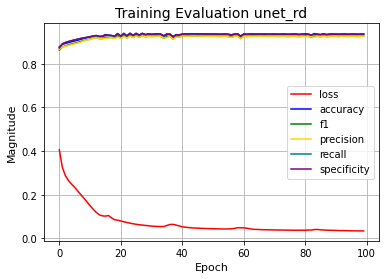

In [4]:
plt.plot(cmd.losses, label='loss', color='red')
plt.plot(cmd.accuracies, label='accuracy', color='blue')
plt.plot(cmd.f1s, label='f1', color='green')
plt.plot(cmd.precisions, label='precision', color='gold')
plt.plot(cmd.recalls, label='recall', color='teal')
plt.plot(cmd.specificities, label='specificity', color='purple')
plt.title('Training Evaluation {}'.format(model_type), fontsize=14)
plt.xlabel('Epoch', fontsize=11)
plt.ylabel('Magnitude', fontsize=11)
plt.grid(True)
plt.legend()
plt.show()

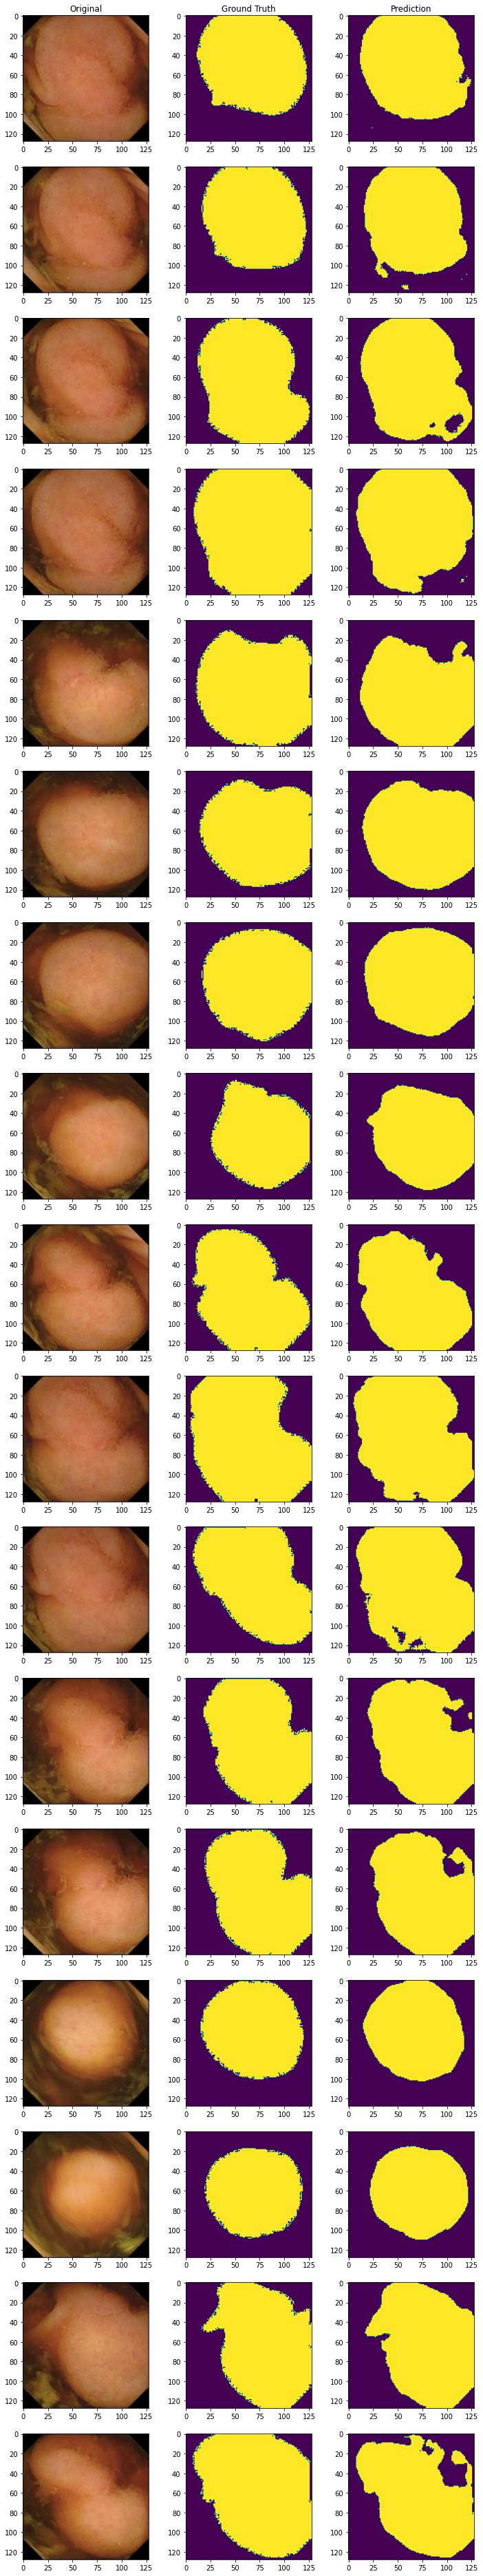

In [5]:
images = sorted(glob.glob("{}/*".format(test_images_dir)))
masks  = sorted(glob.glob("{}/*".format(test_masks_dir)))

dim = (img_width, img_height)

num_images = len(images)
num_cols   = 3

num_display = 20
counter_display = 0

col_names = [
    "Original",
    "Ground Truth",
    "Prediction"
]

fig, axes = plt.subplots(nrows=num_images, ncols=num_cols, figsize=(num_cols*4, num_images*4))

for ax, col in zip(axes[0], col_names):
    ax.set_title(col)
    
counter = 0

scores = []

for i in range(num_images):
    image_file = images[i]
    mask_file  = masks[i]
    
    img  = get_image(image_file, dim)
    mask = get_mask(mask_file, dim)
    
    prediction = get_predicted_img(img, model)
    
    counter += 1
    
    if counter_display < num_display:
        plt.subplot(num_images, num_cols, counter)
        plt.imshow(img)
    
    counter += 1
    
    if counter_display < num_display:
        plt.subplot(num_images, num_cols, counter)
        plt.imshow(mask)
    
    counter += 1
    
    if counter_display < num_display:
        plt.subplot(num_images, num_cols, counter)
        plt.imshow(prediction)
    
    mask_vectorized = mask.ravel().astype(int)
    prediction_vectorized = prediction.ravel().astype(int)
    
    macro_score = jaccard_score(mask_vectorized, prediction_vectorized, average='macro')
    label_score = jaccard_score(mask_vectorized, prediction_vectorized, average=None)
    
    label_specificity = recall_score(mask_vectorized, prediction_vectorized, labels=labels, average=None, zero_division=1)
    label_recall      = recall_score(mask_vectorized, prediction_vectorized, average=None, zero_division=1)
    
    f1          = f1_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    accuracy    = accuracy_score(mask_vectorized, prediction_vectorized)
    precision   = precision_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    recall      = recall_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1) # sensitivity
    specificity = recall_score(mask_vectorized, prediction_vectorized, labels=labels, average='macro', zero_division=1)
    
    jaccard_score_0 = None
    jaccard_score_1 = None
    
    specificity_0 = None
    specificity_1 = None
    
    recall_0 = None
    recall_1 = None
    
    dice_0 = dice_score(mask_vectorized, prediction_vectorized, k=0)
    dice_1 = dice_score(mask_vectorized, prediction_vectorized, k=1)
    
    for i in range(len(label_score)):
        if i == 0:
            jaccard_score_0 = label_score[i]
        elif i == 1:
            jaccard_score_1 = label_score[i]
            
    for i in range(len(label_specificity)):
        if i == 0:
            specificity_0    = label_specificity[i]
        elif i == 1:
            specificity_1    = label_specificity[i]
            
    for i in range(len(label_recall)):
        if i == 0:
            recall_0 = label_recall[i]
        elif i == 1:
            recall_1 = label_recall[i]
        
    
    
    scores.append({
        'image_file':  image_file,
        'mask_file':   mask_file,
        'jaccard_score': macro_score,
        'f1_score': f1,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'precision': precision,
        'specificity': specificity,
        'jaccard_score_0': jaccard_score_0,
        'jaccard_score_1': jaccard_score_1,
        'specificity_0': specificity_0,
        'specificity_1': specificity_1,
        'recall_0': recall_0,
        'recall_1': recall_1,
        'dice_0': dice_0,
        'dice_1': dice_1,
    })
    
    counter_display = counter_display + 1

plt.show()

In [6]:
df_scores = pd.DataFrame(scores)

df_scores

,image_file,mask_file,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,specificity_0,specificity_1,recall_0,recall_1,dice_0,dice_1
0,./tmp/test/images/131368cc17e44240_28958.jpg,./tmp/test/masks/131368cc17e44240_28958.tiff,0.884325,0.938534,0.939880,0.941755,0.936190,0.936190,0.868175,0.900475,0.907146,0.965233,0.907146,0.965233,0.034133,0.947631
1,./tmp/test/images/131368cc17e44240_28960.jpg,./tmp/test/masks/131368cc17e44240_28960.tiff,0.884986,0.938922,0.940002,0.942594,0.936531,0.936531,0.870556,0.899417,0.904254,0.968809,0.904254,0.968809,0.030491,0.947045
2,./tmp/test/images/131368cc17e44240_28961.jpg,./tmp/test/masks/131368cc17e44240_28961.tiff,0.860460,0.924444,0.932312,0.918862,0.931013,0.931013,0.818286,0.902634,0.927219,0.934806,0.927219,0.934806,0.066171,0.948826
3,./tmp/test/images/131368cc17e44240_28963.jpg,./tmp/test/masks/131368cc17e44240_28963.tiff,0.725333,0.834192,0.880676,0.798306,0.923145,0.923145,0.595406,0.855260,0.989000,0.857291,0.989000,0.857291,0.153478,0.921984
4,./tmp/test/images/131368cc17e44240_28967.jpg,./tmp/test/masks/131368cc17e44240_28967.tiff,0.827563,0.904811,0.914429,0.891843,0.926378,0.926378,0.777071,0.878055,0.958047,0.894709,0.958047,0.894709,0.110041,0.935069
5,./tmp/test/images/131368cc17e44240_28968.jpg,./tmp/test/masks/131368cc17e44240_28968.tiff,0.928927,0.963087,0.964966,0.966216,0.960355,0.960355,0.913437,0.944418,0.938633,0.982076,0.938633,0.982076,0.017729,0.971414
6,./tmp/test/images/131368cc17e44240_28972.jpg,./tmp/test/masks/131368cc17e44240_28972.tiff,0.930665,0.964025,0.965820,0.964025,0.964025,0.964025,0.915688,0.945642,0.955989,0.972061,0.955989,0.972061,0.027939,0.972061
7,./tmp/test/images/131368cc17e44240_28974.jpg,./tmp/test/masks/131368cc17e44240_28974.tiff,0.905340,0.950316,0.950378,0.952282,0.950250,0.950250,0.902131,0.908549,0.918495,0.982006,0.918495,0.982006,0.017446,0.952083
8,./tmp/test/images/131368cc17e44240_28981.jpg,./tmp/test/masks/131368cc17e44240_28981.tiff,0.903023,0.948876,0.952271,0.944076,0.954741,0.954741,0.879172,0.926875,0.963590,0.945892,0.963590,0.945892,0.055033,0.962050
9,./tmp/test/images/131368cc17e44240_28986.jpg,./tmp/test/masks/131368cc17e44240_28986.tiff,0.813826,0.894541,0.924072,0.885473,0.904765,0.904765,0.722259,0.905392,0.869390,0.940141,0.869390,0.940141,0.060509,0.950347


In [7]:
df_scores.describe()

,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,specificity_0,specificity_1,recall_0,recall_1,dice_0,dice_1
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.867394,0.926559,0.935497,0.925249,0.936000,0.936000,0.830683,0.904106,0.925782,0.946218,0.925782,0.946218,0.055462,0.949256
std,0.069605,0.042917,0.032228,0.046790,0.034895,0.034895,0.105705,0.037171,0.076137,0.042827,0.076137,0.042827,0.046580,0.020809
min,0.725333,0.834192,0.867615,0.798306,0.823934,0.823934,0.595406,0.825179,0.655621,0.845282,0.655621,0.845282,0.007066,0.904217
25%,0.827563,0.904811,0.924072,0.905408,0.926378,0.926378,0.777071,0.899270,0.918495,0.935044,0.918495,0.935044,0.027146,0.946964
50%,0.884986,0.938922,0.940002,0.942594,0.936531,0.936531,0.870556,0.905392,0.948527,0.965233,0.948527,0.965233,0.034133,0.950347
75%,0.920014,0.958319,0.958862,0.956797,0.960355,0.960355,0.912245,0.937374,0.963590,0.972320,0.963590,0.972320,0.065784,0.967675
max,0.945375,0.971920,0.971924,0.971961,0.971898,0.971898,0.945959,0.946393,0.989000,0.992247,0.989000,0.992247,0.166994,0.972458


In [8]:
df_scores.describe().to_csv("{}-scores-kvasir-capsule.csv".format(model_type))

In [9]:
model_type     = 'unet'

params = {
    'img_height':     img_height,
    'img_width':      img_width,
    'device':         device,
    'gpu_index':      gpu_index,
    'input_img_dir':  input_img_dir,
    'input_mask_dir': input_mask_dir,
    'epochs':         epochs,
    'learning_rate':  learning_rate,
    'in_channels':    in_channels,
    'out_channels':   out_channels,
    'loss_type':      loss_type,
    'batch_size':     batch_size,
    'model_file':     model_file,
    'test_img_dir':   test_images_dir,
    'test_mask_dir':  test_masks_dir,
    'model_type':     model_type
}

cmd = Train(params=params)

cmd.execute()

model = cmd.model

num_parameters = count_parameters(model)

print("Number of Parameters: {}".format(num_parameters))

Training model...
input_img_dir: ./tmp/train/images/
input_mask_dir: ./tmp/train/masks/
CUDA Device: NVIDIA GeForce RTX 3050 Laptop GPU
UNet(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (2): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
    (3): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, a

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.69it/s, loss=0.61]


Ave Loss: 0.6443691924214363
Ave Accuracy: 0.7631297392003676
Ave F1: 0.7159008242375764
Ave Precision: 0.7538334110525873
Ave Recall: 0.71458334907479
Ave Specificity: 0.71458334907479
Saving model to test.pth...
Epoch: 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.81it/s, loss=0.523]


Ave Loss: 0.5484202578663826
Ave Accuracy: 0.8273171817555147
Ave F1: 0.803321133379199
Ave Precision: 0.8154776513417572
Ave Recall: 0.8066380665561426
Ave Specificity: 0.8066380665561426
Saving model to test.pth...
Epoch: 2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.81it/s, loss=0.461]


Ave Loss: 0.4822162427008152
Ave Accuracy: 0.8548260857077206
Ave F1: 0.8382481708132623
Ave Precision: 0.8412967409135665
Ave Recall: 0.8475003486185909
Ave Specificity: 0.8475003486185909
Saving model to test.pth...
Epoch: 3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.57it/s, loss=0.417]


Ave Loss: 0.43489116057753563
Ave Accuracy: 0.8689431583180147
Ave F1: 0.855085006600589
Ave Precision: 0.8548670720064808
Ave Recall: 0.8672586689325926
Ave Specificity: 0.8672586689325926
Saving model to test.pth...
Epoch: 4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.58it/s, loss=0.384]


Ave Loss: 0.3997824266552925
Ave Accuracy: 0.8794268439797794
Ave F1: 0.8671789999676155
Ave Precision: 0.8652415190458268
Ave Recall: 0.8810755037898165
Ave Specificity: 0.8810755037898165
Saving model to test.pth...
Epoch: 5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.12it/s, loss=0.358]


Ave Loss: 0.3725445568561554
Ave Accuracy: 0.8873542336856618
Ave F1: 0.876100420521036
Ave Precision: 0.8731722514707843
Ave Recall: 0.8911911629792897
Ave Specificity: 0.8911911629792897
Saving model to test.pth...
Epoch: 6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.62it/s, loss=0.337]


Ave Loss: 0.35021066665649414
Ave Accuracy: 0.8939711626838235
Ave F1: 0.883460205972094
Ave Precision: 0.8797355179135156
Ave Recall: 0.8994330201875781
Ave Specificity: 0.8994330201875781
Saving model to test.pth...
Epoch: 7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.60it/s, loss=0.318]


Ave Loss: 0.3308388814330101
Ave Accuracy: 0.8983872357536765
Ave F1: 0.8883328137621336
Ave Precision: 0.8840725934955422
Ave Recall: 0.9049084968790532
Ave Specificity: 0.9049084968790532
Saving model to test.pth...
Epoch: 8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.58it/s, loss=0.301]


Ave Loss: 0.313462782651186
Ave Accuracy: 0.9019919002757353
Ave F1: 0.892259077119293
Ave Precision: 0.8876874869182905
Ave Recall: 0.9093050635570058
Ave Specificity: 0.9093050635570058
Saving model to test.pth...
Epoch: 9


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.62it/s, loss=0.284]


Ave Loss: 0.29721492528915405
Ave Accuracy: 0.9051262350643382
Ave F1: 0.8956059808482764
Ave Precision: 0.890961151071742
Ave Recall: 0.9128516264326472
Ave Specificity: 0.9128516264326472
Saving model to test.pth...
Epoch: 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.54it/s, loss=0.265]


Ave Loss: 0.28127554431557655
Ave Accuracy: 0.9081097771139706
Ave F1: 0.8987310028013054
Ave Precision: 0.8941467051999548
Ave Recall: 0.9159446022311194
Ave Specificity: 0.9159446022311194
Saving model to test.pth...
Epoch: 11


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.77it/s, loss=0.247]


Ave Loss: 0.26575511507689953
Ave Accuracy: 0.9120914234834558
Ave F1: 0.9028501926525935
Ave Precision: 0.8984392736055179
Ave Recall: 0.9196565780733099
Ave Specificity: 0.9196565780733099
Saving model to test.pth...
Epoch: 12


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.75it/s, loss=0.232]


Ave Loss: 0.249552546069026
Ave Accuracy: 0.9177712833180147
Ave F1: 0.908817308551869
Ave Precision: 0.9041182147024595
Ave Recall: 0.925548827363743
Ave Specificity: 0.925548827363743
Saving model to test.pth...
Epoch: 13


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.79it/s, loss=0.216]


Ave Loss: 0.23508325591683388
Ave Accuracy: 0.9177748736213235
Ave F1: 0.908722429831265
Ave Precision: 0.9044133959890843
Ave Recall: 0.9247647792770325
Ave Specificity: 0.9247647792770325
Saving model to test.pth...
Epoch: 14


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.58it/s, loss=0.204]


Ave Loss: 0.22403909638524055
Ave Accuracy: 0.9098331227022058
Ave F1: 0.9004029331872735
Ave Precision: 0.8975965990067049
Ave Recall: 0.9161333109725454
Ave Specificity: 0.9161333109725454
Saving model to test.pth...
Epoch: 15


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.60it/s, loss=0.197]


Ave Loss: 0.2163519375026226
Ave Accuracy: 0.9227330824908089
Ave F1: 0.9137071950054713
Ave Precision: 0.9094883959091781
Ave Recall: 0.9287311646560148
Ave Specificity: 0.9287311646560148
Saving model to test.pth...
Epoch: 16


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.53it/s, loss=0.187]


Ave Loss: 0.20540335774421692
Ave Accuracy: 0.9198680204503676
Ave F1: 0.9109482800843661
Ave Precision: 0.9065820619684929
Ave Recall: 0.927441985616849
Ave Specificity: 0.927441985616849
Saving model to test.pth...
Epoch: 17


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.60it/s, loss=0.178]


Ave Loss: 0.1957868877798319
Ave Accuracy: 0.923828125
Ave F1: 0.9147809798698882
Ave Precision: 0.9112399430352509
Ave Recall: 0.9289010112957318
Ave Specificity: 0.9289010112957318
Saving model to test.pth...
Epoch: 18


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.46it/s, loss=0.172]


Ave Loss: 0.18746426701545715
Ave Accuracy: 0.9253216911764706
Ave F1: 0.9166135033135762
Ave Precision: 0.9127692864833377
Ave Recall: 0.9312373857771082
Ave Specificity: 0.9312373857771082
Saving model to test.pth...
Epoch: 19


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.53it/s, loss=0.165]


Ave Loss: 0.18046648427844048
Ave Accuracy: 0.9272676355698529
Ave F1: 0.9184427244267845
Ave Precision: 0.9154361001026988
Ave Recall: 0.9314106750182198
Ave Specificity: 0.9314106750182198
Saving model to test.pth...
Epoch: 20


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.66it/s, loss=0.161]


Ave Loss: 0.17442872188985348
Ave Accuracy: 0.92840576171875
Ave F1: 0.9190784679921358
Ave Precision: 0.9167798739194757
Ave Recall: 0.9304364725274478
Ave Specificity: 0.9304364725274478
Saving model to test.pth...
Epoch: 21


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.53it/s, loss=0.157]


Ave Loss: 0.16955823823809624
Ave Accuracy: 0.9281041762408089
Ave F1: 0.9193413869574146
Ave Precision: 0.9164760489521879
Ave Recall: 0.9320672212442983
Ave Specificity: 0.9320672212442983
Saving model to test.pth...
Epoch: 22


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.47it/s, loss=0.154]


Ave Loss: 0.16601495817303658
Ave Accuracy: 0.9220114315257353
Ave F1: 0.9128167967373857
Ave Precision: 0.910885799160938
Ave Recall: 0.9253936287680253
Ave Specificity: 0.9253936287680253
Saving model to test.pth...
Epoch: 23


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.54it/s, loss=0.156]


Ave Loss: 0.16376781091094017
Ave Accuracy: 0.9280431410845589
Ave F1: 0.9184085518963726
Ave Precision: 0.9162855537462977
Ave Recall: 0.9294150251552938
Ave Specificity: 0.9294150251552938
Saving model to test.pth...
Epoch: 24


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.71it/s, loss=0.149]


Ave Loss: 0.1633669827133417
Ave Accuracy: 0.9312600528492647
Ave F1: 0.9225827365428894
Ave Precision: 0.9193360387792291
Ave Recall: 0.9349077476261229
Ave Specificity: 0.9349077476261229
Saving model to test.pth...
Epoch: 25


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.70it/s, loss=0.147]


Ave Loss: 0.16067836619913578
Ave Accuracy: 0.9236342486213235
Ave F1: 0.914470643853397
Ave Precision: 0.9130790227298272
Ave Recall: 0.9264049472694741
Ave Specificity: 0.9264049472694741
Saving model to test.pth...
Epoch: 26


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.68it/s, loss=0.143]


Ave Loss: 0.1548406295478344
Ave Accuracy: 0.9299639533547794
Ave F1: 0.9210936730458893
Ave Precision: 0.9189235478692442
Ave Recall: 0.9326053763485703
Ave Specificity: 0.9326053763485703
Saving model to test.pth...
Epoch: 27


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.51it/s, loss=0.14]


Ave Loss: 0.15032370574772358
Ave Accuracy: 0.9336511948529411
Ave F1: 0.9248251929097787
Ave Precision: 0.9222498263615567
Ave Recall: 0.9357786212016419
Ave Specificity: 0.9357786212016419
Saving model to test.pth...
Epoch: 28


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.53it/s, loss=0.138]


Ave Loss: 0.1473167072981596
Ave Accuracy: 0.9297987994025735
Ave F1: 0.9209936894324233
Ave Precision: 0.9192134861231567
Ave Recall: 0.9324906604270151
Ave Specificity: 0.9324906604270151
Saving model to test.pth...
Epoch: 29


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.67it/s, loss=0.136]


Ave Loss: 0.14462300576269627
Ave Accuracy: 0.9345739028033089
Ave F1: 0.9257949091045052
Ave Precision: 0.9235033319596476
Ave Recall: 0.9362526638524001
Ave Specificity: 0.9362526638524001
Saving model to test.pth...
Epoch: 30


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.69it/s, loss=0.134]


Ave Loss: 0.14231322892010212
Ave Accuracy: 0.9313749425551471
Ave F1: 0.9226904935696448
Ave Precision: 0.9208697328373069
Ave Recall: 0.9339166629127631
Ave Specificity: 0.9339166629127631
Saving model to test.pth...
Epoch: 31


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.65it/s, loss=0.132]


Ave Loss: 0.14026156067848206
Ave Accuracy: 0.9327500287224265
Ave F1: 0.923895246216758
Ave Precision: 0.9221953367072795
Ave Recall: 0.9343655031305955
Ave Specificity: 0.9343655031305955
Saving model to test.pth...
Epoch: 32


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.64it/s, loss=0.131]


Ave Loss: 0.13836236856877804
Ave Accuracy: 0.9335183536305147
Ave F1: 0.9249378421295195
Ave Precision: 0.9230239975967826
Ave Recall: 0.935721347865015
Ave Specificity: 0.935721347865015
Saving model to test.pth...
Epoch: 33


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.79it/s, loss=0.129]


Ave Loss: 0.13666344806551933
Ave Accuracy: 0.9327572093290442
Ave F1: 0.9238884475926314
Ave Precision: 0.922626420038741
Ave Recall: 0.9341029242529755
Ave Specificity: 0.9341029242529755
Saving model to test.pth...
Epoch: 34


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.64it/s, loss=0.128]


Ave Loss: 0.13502756506204605
Ave Accuracy: 0.9320642807904411
Ave F1: 0.9235047576067652
Ave Precision: 0.9216055140873024
Ave Recall: 0.9345920532028255
Ave Specificity: 0.9345920532028255
Saving model to test.pth...
Epoch: 35


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.65it/s, loss=0.126]


Ave Loss: 0.1336635835468769
Ave Accuracy: 0.9339779124540442
Ave F1: 0.9252241538357446
Ave Precision: 0.9237761844095133
Ave Recall: 0.9352525352726692
Ave Specificity: 0.9352525352726692
Saving model to test.pth...
Epoch: 36


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.73it/s, loss=0.125]


Ave Loss: 0.1323263654485345
Ave Accuracy: 0.9360638786764706
Ave F1: 0.9275339995236728
Ave Precision: 0.92561838737497
Ave Recall: 0.9374951875639417
Ave Specificity: 0.9374951875639417
Saving model to test.pth...
Epoch: 37


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.62it/s, loss=0.125]


Ave Loss: 0.13177329767495394
Ave Accuracy: 0.9279677447150735
Ave F1: 0.9192063766198834
Ave Precision: 0.917822406640006
Ave Recall: 0.9305355260915773
Ave Specificity: 0.9305355260915773
Saving model to test.pth...
Epoch: 38


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.64it/s, loss=0.124]


Ave Loss: 0.1315049920231104
Ave Accuracy: 0.9313928940716911
Ave F1: 0.9227941683513702
Ave Precision: 0.9212405086180713
Ave Recall: 0.9338292174685855
Ave Specificity: 0.9338292174685855
Saving model to test.pth...
Epoch: 39


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.83it/s, loss=0.124]


Ave Loss: 0.1306980811059475
Ave Accuracy: 0.9352524701286765
Ave F1: 0.9260664060904146
Ave Precision: 0.9236791674662675
Ave Recall: 0.9357642029535798
Ave Specificity: 0.9357642029535798
Saving model to test.pth...
Epoch: 40


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.79it/s, loss=0.124]


Ave Loss: 0.13108246680349112
Ave Accuracy: 0.9244815602022058
Ave F1: 0.9157878653611247
Ave Precision: 0.9140576832951094
Ave Recall: 0.927440553393391
Ave Specificity: 0.927440553393391
Saving model to test.pth...
Epoch: 41


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.78it/s, loss=0.121]


Ave Loss: 0.12890869472175837
Ave Accuracy: 0.9357263901654411
Ave F1: 0.9267591479725575
Ave Precision: 0.9242403192361255
Ave Recall: 0.9368088377793319
Ave Specificity: 0.9368088377793319
Saving model to test.pth...
Epoch: 42


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.58it/s, loss=0.12]


Ave Loss: 0.12675662524998188
Ave Accuracy: 0.9319996553308824
Ave F1: 0.9235922686084613
Ave Precision: 0.9216923198544019
Ave Recall: 0.9344154628088978
Ave Specificity: 0.9344154628088978
Saving model to test.pth...
Epoch: 43


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.81it/s, loss=0.118]


Ave Loss: 0.12523820251226425
Ave Accuracy: 0.9336332433363971
Ave F1: 0.9249067852320674
Ave Precision: 0.9235121892657012
Ave Recall: 0.9350130482593567
Ave Specificity: 0.9350130482593567
Saving model to test.pth...
Epoch: 44


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.56it/s, loss=0.118]


Ave Loss: 0.12400726415216923
Ave Accuracy: 0.9343692555147058
Ave F1: 0.9257806236656771
Ave Precision: 0.9243740154134228
Ave Recall: 0.9358383393779701
Ave Specificity: 0.9358383393779701
Saving model to test.pth...
Epoch: 45


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.83it/s, loss=0.117]


Ave Loss: 0.12294333521276712
Ave Accuracy: 0.93328857421875
Ave F1: 0.9248901833081513
Ave Precision: 0.9229682963594468
Ave Recall: 0.935736982627354
Ave Specificity: 0.935736982627354
Saving model to test.pth...
Epoch: 46


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.81it/s, loss=0.116]


Ave Loss: 0.12196105439215899
Ave Accuracy: 0.9352381089154411
Ave F1: 0.9266485077105893
Ave Precision: 0.9250645950792961
Ave Recall: 0.9363740354156159
Ave Specificity: 0.9363740354156159
Saving model to test.pth...
Epoch: 47


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.80it/s, loss=0.115]


Ave Loss: 0.12106645479798317
Ave Accuracy: 0.9322796989889706
Ave F1: 0.9237916135853477
Ave Precision: 0.9221523916077088
Ave Recall: 0.9346390518359915
Ave Specificity: 0.9346390518359915
Saving model to test.pth...
Epoch: 48


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.72it/s, loss=0.114]


Ave Loss: 0.12018145062029362
Ave Accuracy: 0.9358017865349265
Ave F1: 0.9272817652939662
Ave Precision: 0.9253957216739345
Ave Recall: 0.9371772947488285
Ave Specificity: 0.9371772947488285
Saving model to test.pth...
Epoch: 49


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.73it/s, loss=0.113]


Ave Loss: 0.11933553870767355
Ave Accuracy: 0.9329187729779411
Ave F1: 0.9244755317488433
Ave Precision: 0.9228675964346218
Ave Recall: 0.9350314447152593
Ave Specificity: 0.9350314447152593
Saving model to test.pth...
Epoch: 50


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.77it/s, loss=0.113]


Ave Loss: 0.11850686650723219
Ave Accuracy: 0.9352057961856618
Ave F1: 0.92671332844382
Ave Precision: 0.9248899185398828
Ave Recall: 0.9367922132561095
Ave Specificity: 0.9367922132561095
Saving model to test.pth...
Epoch: 51


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.79it/s, loss=0.112]


Ave Loss: 0.11771988961845636
Ave Accuracy: 0.9342902688419118
Ave F1: 0.925871817296096
Ave Precision: 0.9241041073564094
Ave Recall: 0.9362358657136362
Ave Specificity: 0.9362358657136362
Saving model to test.pth...
Epoch: 52


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.72it/s, loss=0.111]


Ave Loss: 0.1169847771525383
Ave Accuracy: 0.9337265912224265
Ave F1: 0.9252502605148922
Ave Precision: 0.9238150371717553
Ave Recall: 0.9354200687837129
Ave Specificity: 0.9354200687837129
Saving model to test.pth...
Epoch: 53


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.74it/s, loss=0.111]


Ave Loss: 0.11634096689522266
Ave Accuracy: 0.9345056870404411
Ave F1: 0.9259567611444979
Ave Precision: 0.9243575941643563
Ave Recall: 0.9360232001508365
Ave Specificity: 0.9360232001508365
Saving model to test.pth...
Epoch: 54


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.67it/s, loss=0.11]


Ave Loss: 0.11572967749089003
Ave Accuracy: 0.9346959731158089
Ave F1: 0.9264240785292105
Ave Precision: 0.9240901312780008
Ave Recall: 0.9371688014768876
Ave Specificity: 0.9371688014768876
Saving model to test.pth...
Epoch: 55


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.63it/s, loss=0.11]


Ave Loss: 0.11537181958556175
Ave Accuracy: 0.9314395680147058
Ave F1: 0.9225711086963647
Ave Precision: 0.9221713393494143
Ave Recall: 0.9321374647451471
Ave Specificity: 0.9321374647451471
Saving model to test.pth...
Epoch: 56


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.48it/s, loss=0.11]


Ave Loss: 0.11535822320729494
Ave Accuracy: 0.9355396943933824
Ave F1: 0.9272676791783333
Ave Precision: 0.924836735267927
Ave Recall: 0.9377745848961843
Ave Specificity: 0.9377745848961843
Saving model to test.pth...
Epoch: 57


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.79it/s, loss=0.109]


Ave Loss: 0.11511658784002066
Ave Accuracy: 0.9321935317095589
Ave F1: 0.9236599341619995
Ave Precision: 0.9216878942606831
Ave Recall: 0.9347658900602456
Ave Specificity: 0.9347658900602456
Saving model to test.pth...
Epoch: 58


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.50it/s, loss=0.11]


Ave Loss: 0.11504760570824146
Ave Accuracy: 0.9300680721507353
Ave F1: 0.9213672546543402
Ave Precision: 0.9203273592486549
Ave Recall: 0.9311989162968393
Ave Specificity: 0.9311989162968393
Saving model to test.pth...
Epoch: 59


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.51it/s, loss=0.109]


Ave Loss: 0.11466047167778015
Ave Accuracy: 0.9335470760569853
Ave F1: 0.924810438946599
Ave Precision: 0.9228471692847692
Ave Recall: 0.9351313386074865
Ave Specificity: 0.9351313386074865
Saving model to test.pth...
Epoch: 60


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.55it/s, loss=0.107]


Ave Loss: 0.1133880764245987
Ave Accuracy: 0.9325166590073529
Ave F1: 0.9239826301129577
Ave Precision: 0.9226433120447206
Ave Recall: 0.9341887214527324
Ave Specificity: 0.9341887214527324
Saving model to test.pth...
Epoch: 61


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.58it/s, loss=0.106]


Ave Loss: 0.11206147447228432
Ave Accuracy: 0.9359489889705882
Ave F1: 0.9276896393435344
Ave Precision: 0.925101844540068
Ave Recall: 0.9384290705954712
Ave Specificity: 0.9384290705954712
Saving model to test.pth...
Epoch: 62


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.77it/s, loss=0.105]


Ave Loss: 0.11119209043681622
Ave Accuracy: 0.9328469669117647
Ave F1: 0.9242097712444196
Ave Precision: 0.923084401980243
Ave Recall: 0.9342136093977721
Ave Specificity: 0.9342136093977721
Saving model to test.pth...
Epoch: 63


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.63it/s, loss=0.105]


Ave Loss: 0.1105349026620388
Ave Accuracy: 0.9354283949908089
Ave F1: 0.927294920781018
Ave Precision: 0.9244237141510789
Ave Recall: 0.9383283217956216
Ave Specificity: 0.9383283217956216
Saving model to test.pth...
Epoch: 64


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.72it/s, loss=0.104]


Ave Loss: 0.10992280393838882
Ave Accuracy: 0.9331772748161765
Ave F1: 0.9243457860642854
Ave Precision: 0.9237585668493398
Ave Recall: 0.9337354840831693
Ave Specificity: 0.9337354840831693
Saving model to test.pth...
Epoch: 65


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.58it/s, loss=0.104]


Ave Loss: 0.10928566288203001
Ave Accuracy: 0.9346995634191176
Ave F1: 0.9265928362776649
Ave Precision: 0.9234916856584148
Ave Recall: 0.9379929500987746
Ave Specificity: 0.9379929500987746
Saving model to test.pth...
Epoch: 66


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.50it/s, loss=0.103]


Ave Loss: 0.10870961472392082
Ave Accuracy: 0.9338594324448529
Ave F1: 0.9250863671055126
Ave Precision: 0.9243428549844817
Ave Recall: 0.9344811364798487
Ave Specificity: 0.9344811364798487
Saving model to test.pth...
Epoch: 67


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.62it/s, loss=0.103]


Ave Loss: 0.10815820470452309
Ave Accuracy: 0.9346133961397058
Ave F1: 0.926484920500363
Ave Precision: 0.9234976865292314
Ave Recall: 0.9377822515570939
Ave Specificity: 0.9377822515570939
Saving model to test.pth...
Epoch: 68


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.63it/s, loss=0.102]


Ave Loss: 0.10764736123383045
Ave Accuracy: 0.9333280675551471
Ave F1: 0.9246319094972695
Ave Precision: 0.9237199115888202
Ave Recall: 0.9343330932921966
Ave Specificity: 0.9343330932921966
Saving model to test.pth...
Epoch: 69


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.64it/s, loss=0.102]


Ave Loss: 0.10713962651789188
Ave Accuracy: 0.9356330422794118
Ave F1: 0.9275168971053409
Ave Precision: 0.9246182307820705
Ave Recall: 0.9385253620086682
Ave Specificity: 0.9385253620086682
Saving model to test.pth...
Epoch: 70


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.62it/s, loss=0.101]


Ave Loss: 0.10664398781955242
Ave Accuracy: 0.9334250057444853
Ave F1: 0.9248292182543828
Ave Precision: 0.9237056660092168
Ave Recall: 0.9346676842700546
Ave Specificity: 0.9346676842700546
Saving model to test.pth...
Epoch: 71


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.60it/s, loss=0.101]


Ave Loss: 0.10610089544206858
Ave Accuracy: 0.9350191004136029
Ave F1: 0.9268625116804986
Ave Precision: 0.9240736072376715
Ave Recall: 0.9379165392235794
Ave Specificity: 0.9379165392235794
Saving model to test.pth...
Epoch: 72


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.62it/s, loss=0.1]


Ave Loss: 0.10556994285434484
Ave Accuracy: 0.9344123391544118
Ave F1: 0.9258063068928462
Ave Precision: 0.9246501579479848
Ave Recall: 0.9354470048297472
Ave Specificity: 0.9354470048297472
Saving model to test.pth...
Epoch: 73


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.70it/s, loss=0.0996]


Ave Loss: 0.1050748135894537
Ave Accuracy: 0.9344338809742647
Ave F1: 0.9262554001247586
Ave Precision: 0.9235605756513774
Ave Recall: 0.9373159030441479
Ave Specificity: 0.9373159030441479
Saving model to test.pth...
Epoch: 74


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.66it/s, loss=0.0992]


Ave Loss: 0.10462475661188364
Ave Accuracy: 0.9331162396599265
Ave F1: 0.9244740650423227
Ave Precision: 0.9233207734806527
Ave Recall: 0.934445668691784
Ave Specificity: 0.934445668691784
Saving model to test.pth...
Epoch: 75


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.32it/s, loss=0.0989]


Ave Loss: 0.10424454417079687
Ave Accuracy: 0.9360926011029411
Ave F1: 0.9279169529001874
Ave Precision: 0.9251890335211496
Ave Recall: 0.9385965086662309
Ave Specificity: 0.9385965086662309
Saving model to test.pth...
Epoch: 76


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.22it/s, loss=0.0986]


Ave Loss: 0.10390229988843203
Ave Accuracy: 0.9333783318014706
Ave F1: 0.9248647876634637
Ave Precision: 0.9234673712612106
Ave Recall: 0.9348221147400001
Ave Specificity: 0.9348221147400001
Saving model to test.pth...
Epoch: 77


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.55it/s, loss=0.0981]


Ave Loss: 0.1034464668482542
Ave Accuracy: 0.9324879365808824
Ave F1: 0.9241752339935422
Ave Precision: 0.9217583059114335
Ave Recall: 0.9354693382026111
Ave Specificity: 0.9354693382026111
Saving model to test.pth...
Epoch: 78


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.79it/s, loss=0.0983]


Ave Loss: 0.10325995646417141
Ave Accuracy: 0.9368465647977942
Ave F1: 0.928295218642342
Ave Precision: 0.9264285788957722
Ave Recall: 0.9376743561139886
Ave Specificity: 0.9376743561139886
Saving model to test.pth...
Epoch: 79


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.74it/s, loss=0.0981]


Ave Loss: 0.10324927978217602
Ave Accuracy: 0.9324520335477942
Ave F1: 0.9241566074186292
Ave Precision: 0.9219912862043841
Ave Recall: 0.9347225894252705
Ave Specificity: 0.9347225894252705
Saving model to test.pth...
Epoch: 80


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.82it/s, loss=0.0975]


Ave Loss: 0.10294339060783386
Ave Accuracy: 0.9315544577205882
Ave F1: 0.9229695377035996
Ave Precision: 0.9210849911465717
Ave Recall: 0.934002315520368
Ave Specificity: 0.934002315520368
Saving model to test.pth...
Epoch: 81


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.84it/s, loss=0.0976]


Ave Loss: 0.102807292714715
Ave Accuracy: 0.9371409696691176
Ave F1: 0.9285836914367844
Ave Precision: 0.926254169656608
Ave Recall: 0.9381044271668216
Ave Specificity: 0.9381044271668216
Saving model to test.pth...
Epoch: 82


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.68it/s, loss=0.0972]


Ave Loss: 0.10239223204553127
Ave Accuracy: 0.9283375459558824
Ave F1: 0.9197573054377755
Ave Precision: 0.9178657781169965
Ave Recall: 0.9308231431663403
Ave Specificity: 0.9308231431663403
Saving model to test.pth...
Epoch: 83


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.20it/s, loss=0.0961]


Ave Loss: 0.10157366842031479
Ave Accuracy: 0.9369399126838235
Ave F1: 0.9284308144320959
Ave Precision: 0.9263576531641312
Ave Recall: 0.9380724880270883
Ave Specificity: 0.9380724880270883
Saving model to test.pth...
Epoch: 84


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.12it/s, loss=0.0952]


Ave Loss: 0.10080462694168091
Ave Accuracy: 0.9339850930606618
Ave F1: 0.9257302471323343
Ave Precision: 0.9234509653055876
Ave Recall: 0.9364504492525131
Ave Specificity: 0.9364504492525131
Saving model to test.pth...
Epoch: 85


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.37it/s, loss=0.0946]


Ave Loss: 0.10007687844336033
Ave Accuracy: 0.9341646082261029
Ave F1: 0.9256756165206793
Ave Precision: 0.9239786584004227
Ave Recall: 0.935922878439735
Ave Specificity: 0.935922878439735
Saving model to test.pth...
Epoch: 86


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.04it/s, loss=0.0942]


Ave Loss: 0.09961059782654047
Ave Accuracy: 0.9363223805147058
Ave F1: 0.9281705799409532
Ave Precision: 0.9255175737564081
Ave Recall: 0.9386665832024785
Ave Specificity: 0.9386665832024785
Saving model to test.pth...
Epoch: 87


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.40it/s, loss=0.0939]


Ave Loss: 0.09925827942788601
Ave Accuracy: 0.9328182444852942
Ave F1: 0.9243283058853454
Ave Precision: 0.9228045286473102
Ave Recall: 0.9345273635064707
Ave Specificity: 0.9345273635064707
Saving model to test.pth...
Epoch: 88


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.21it/s, loss=0.0936]


Ave Loss: 0.09889617096632719
Ave Accuracy: 0.9363798253676471
Ave F1: 0.9281677591620394
Ave Precision: 0.9252238037817565
Ave Recall: 0.938899652895799
Ave Specificity: 0.938899652895799
Saving model to test.pth...
Epoch: 89


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.98it/s, loss=0.0932]


Ave Loss: 0.09850702621042728
Ave Accuracy: 0.9328110638786765
Ave F1: 0.9243300749488876
Ave Precision: 0.923084851376053
Ave Recall: 0.9342580887660494
Ave Specificity: 0.9342580887660494
Saving model to test.pth...
Epoch: 90


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.53it/s, loss=0.0927]


Ave Loss: 0.09803926665335894
Ave Accuracy: 0.9362254423253676
Ave F1: 0.9280589097609548
Ave Precision: 0.924999208344274
Ave Recall: 0.9389976475131401
Ave Specificity: 0.9389976475131401
Saving model to test.pth...
Epoch: 91


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.62it/s, loss=0.0923]


Ave Loss: 0.0976122384890914
Ave Accuracy: 0.9337517233455882
Ave F1: 0.92527235869237
Ave Precision: 0.9241064685845886
Ave Recall: 0.934966919640653
Ave Specificity: 0.934966919640653
Saving model to test.pth...
Epoch: 92


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.52it/s, loss=0.092]


Ave Loss: 0.09717085398733616
Ave Accuracy: 0.9351232192095589
Ave F1: 0.9270216902934099
Ave Precision: 0.9238100307105351
Ave Recall: 0.9384064544797946
Ave Specificity: 0.9384064544797946
Saving model to test.pth...
Epoch: 93


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.00it/s, loss=0.0916]


Ave Loss: 0.09677164442837238
Ave Accuracy: 0.93475341796875
Ave F1: 0.9262630699672495
Ave Precision: 0.9249883637447361
Ave Recall: 0.9358436192040094
Ave Specificity: 0.9358436192040094
Saving model to test.pth...
Epoch: 94


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.33it/s, loss=0.0913]


Ave Loss: 0.09636230114847422
Ave Accuracy: 0.9343656652113971
Ave F1: 0.9262391545615221
Ave Precision: 0.9232618630135806
Ave Recall: 0.9374724445788699
Ave Specificity: 0.9374724445788699
Saving model to test.pth...
Epoch: 95


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.13it/s, loss=0.0908]


Ave Loss: 0.09595400653779507
Ave Accuracy: 0.9347498276654411
Ave F1: 0.9263006318607705
Ave Precision: 0.9246125096714287
Ave Recall: 0.9362823487287095
Ave Specificity: 0.9362823487287095
Saving model to test.pth...
Epoch: 96


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  8.00it/s, loss=0.0904]


Ave Loss: 0.09556206688284874
Ave Accuracy: 0.9351268095128676
Ave F1: 0.926991931954925
Ave Precision: 0.9242769601770723
Ave Recall: 0.937772699473981
Ave Specificity: 0.937772699473981
Saving model to test.pth...
Epoch: 97


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.30it/s, loss=0.09]


Ave Loss: 0.09518180601298809
Ave Accuracy: 0.9342615464154411
Ave F1: 0.9259014421454341
Ave Precision: 0.9239335272326019
Ave Recall: 0.9361361603307771
Ave Specificity: 0.9361361603307771
Saving model to test.pth...
Epoch: 98


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.63it/s, loss=0.0897]


Ave Loss: 0.0948454961180687
Ave Accuracy: 0.9350119198069853
Ave F1: 0.9267835882942465
Ave Precision: 0.9241716672788769
Ave Recall: 0.9375948187800527
Ave Specificity: 0.9375948187800527
Saving model to test.pth...
Epoch: 99


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.74it/s, loss=0.0896]


Ave Loss: 0.09459156729280949
Ave Accuracy: 0.9343584846047794
Ave F1: 0.9260957596002175
Ave Precision: 0.9235573270811797
Ave Recall: 0.9367271340562846
Ave Specificity: 0.9367271340562846
Saving model to test.pth...
Number of Parameters: 31037698


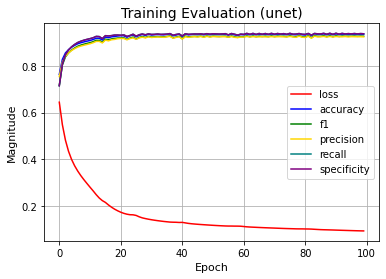

In [10]:
plt.plot(cmd.losses, label='loss', color='red')
plt.plot(cmd.accuracies, label='accuracy', color='blue')
plt.plot(cmd.f1s, label='f1', color='green')
plt.plot(cmd.precisions, label='precision', color='gold')
plt.plot(cmd.recalls, label='recall', color='teal')
plt.plot(cmd.specificities, label='specificity', color='purple')
plt.title('Training Evaluation ({})'.format(model_type), fontsize=14)
plt.xlabel('Epoch', fontsize=11)
plt.ylabel('Magnitude', fontsize=11)
plt.grid(True)
plt.legend()
plt.show()

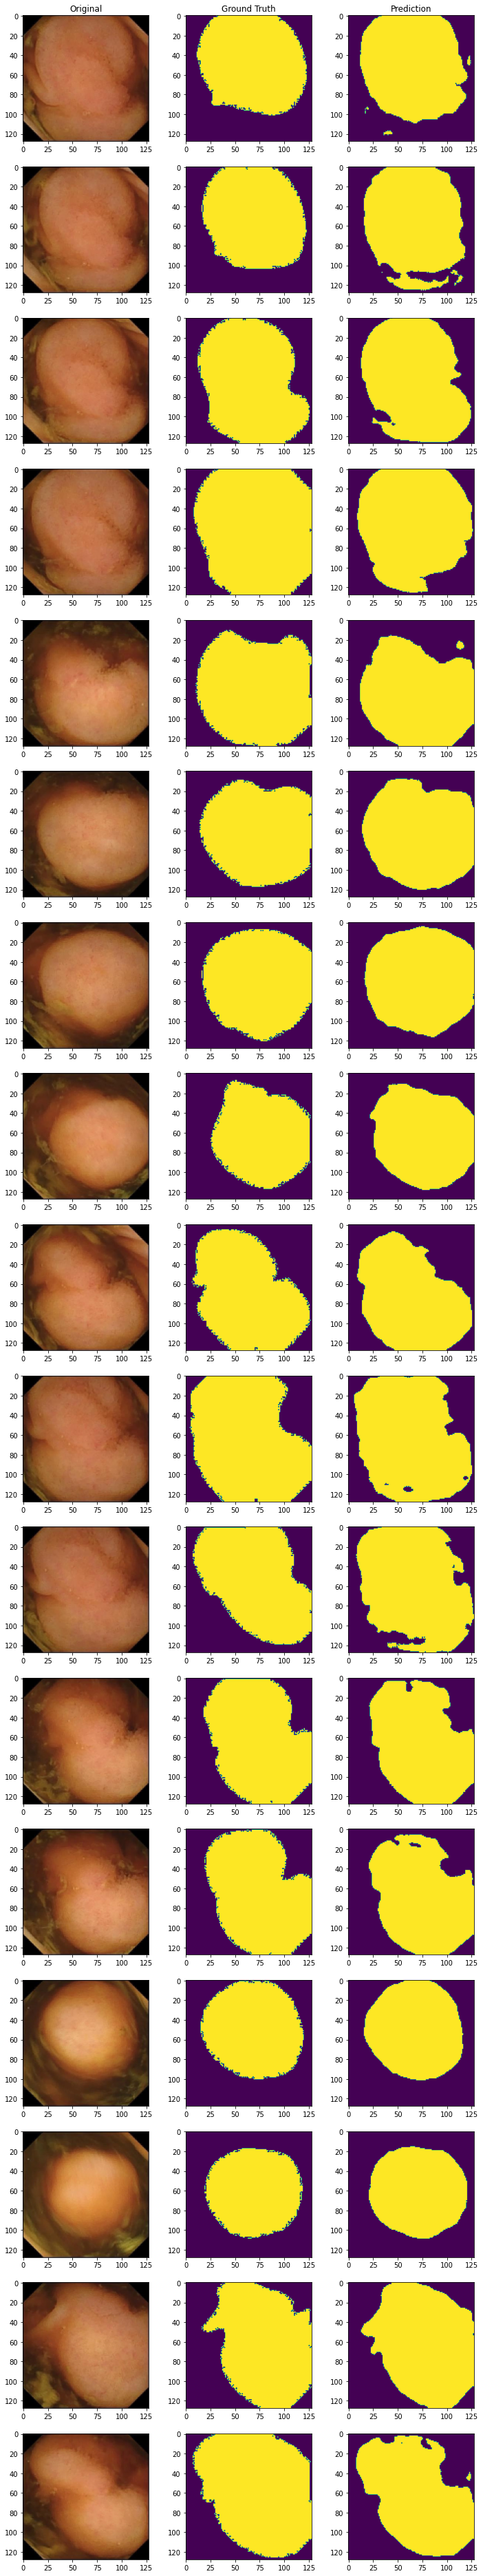

In [11]:
images = sorted(glob.glob("{}/*".format(test_images_dir)))
masks  = sorted(glob.glob("{}/*".format(test_masks_dir)))

dim = (img_width, img_height)

num_images = len(images)
num_cols   = 3

num_display = 20
counter_display = 0

col_names = [
    "Original",
    "Ground Truth",
    "Prediction"
]

fig, axes = plt.subplots(nrows=num_images, ncols=num_cols, figsize=(num_cols*4, num_images*4))

for ax, col in zip(axes[0], col_names):
    ax.set_title(col)
    
counter = 0

scores = []

for i in range(num_images):
    image_file = images[i]
    mask_file  = masks[i]
    
    img  = get_image(image_file, dim)
    mask = get_mask(mask_file, dim)
    
    prediction = get_predicted_img(img, model)
    
    counter += 1
    
    if counter_display < num_display:
        plt.subplot(num_images, num_cols, counter)
        plt.imshow(img)
    
    counter += 1
    
    if counter_display < num_display:
        plt.subplot(num_images, num_cols, counter)
        plt.imshow(mask)
    
    counter += 1
    
    if counter_display < num_display:
        plt.subplot(num_images, num_cols, counter)
        plt.imshow(prediction)
    
    mask_vectorized = mask.ravel().astype(int)
    prediction_vectorized = prediction.ravel().astype(int)
    
    macro_score = jaccard_score(mask_vectorized, prediction_vectorized, average='macro')
    label_score = jaccard_score(mask_vectorized, prediction_vectorized, average=None)
    
    label_specificity = recall_score(mask_vectorized, prediction_vectorized, labels=labels, average=None, zero_division=1)
    label_recall      = recall_score(mask_vectorized, prediction_vectorized, average=None, zero_division=1)
    
    f1          = f1_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    accuracy    = accuracy_score(mask_vectorized, prediction_vectorized)
    precision   = precision_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    recall      = recall_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1) # sensitivity
    specificity = recall_score(mask_vectorized, prediction_vectorized, labels=labels, average='macro', zero_division=1)
    
    jaccard_score_0 = None
    jaccard_score_1 = None
    
    specificity_0 = None
    specificity_1 = None
    
    recall_0 = None
    recall_1 = None
    
    dice_0 = dice_score(mask_vectorized, prediction_vectorized, k=0)
    dice_1 = dice_score(mask_vectorized, prediction_vectorized, k=1)
    
    for i in range(len(label_score)):
        if i == 0:
            jaccard_score_0 = label_score[i]
        elif i == 1:
            jaccard_score_1 = label_score[i]
            
    for i in range(len(label_specificity)):
        if i == 0:
            specificity_0    = label_specificity[i]
        elif i == 1:
            specificity_1    = label_specificity[i]
            
    for i in range(len(label_recall)):
        if i == 0:
            recall_0 = label_recall[i]
        elif i == 1:
            recall_1 = label_recall[i]
        
    
    
    scores.append({
        'image_file':  image_file,
        'mask_file':   mask_file,
        'jaccard_score': macro_score,
        'f1_score': f1,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'precision': precision,
        'specificity': specificity,
        'jaccard_score_0': jaccard_score_0,
        'jaccard_score_1': jaccard_score_1,
        'specificity_0': specificity_0,
        'specificity_1': specificity_1,
        'recall_0': recall_0,
        'recall_1': recall_1,
        'dice_0': dice_0,
        'dice_1': dice_1,
    })
    
    counter_display = counter_display + 1

plt.show()

In [12]:
df_scores_unet = pd.DataFrame(scores)

df_scores_unet

,image_file,mask_file,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,specificity_0,specificity_1,recall_0,recall_1,dice_0,dice_1
0,./tmp/test/images/131368cc17e44240_28958.jpg,./tmp/test/masks/131368cc17e44240_28958.tiff,0.867361,0.928854,0.930603,0.933846,0.925625,0.925625,0.847913,0.886809,0.886449,0.964800,0.886449,0.964800,0.034295,0.940009
1,./tmp/test/images/131368cc17e44240_28960.jpg,./tmp/test/masks/131368cc17e44240_28960.tiff,0.818180,0.899745,0.902527,0.911329,0.894965,0.894965,0.790585,0.845775,0.824648,0.965282,0.824648,0.965282,0.032962,0.916444
2,./tmp/test/images/131368cc17e44240_28961.jpg,./tmp/test/masks/131368cc17e44240_28961.tiff,0.899828,0.946973,0.952942,0.944665,0.949411,0.949411,0.867730,0.931927,0.939101,0.959720,0.939101,0.959720,0.040492,0.964764
3,./tmp/test/images/131368cc17e44240_28963.jpg,./tmp/test/masks/131368cc17e44240_28963.tiff,0.722460,0.832128,0.879028,0.796489,0.921335,0.921335,0.591593,0.853326,0.986937,0.855733,0.986937,0.855733,0.155247,0.920859
4,./tmp/test/images/131368cc17e44240_28967.jpg,./tmp/test/masks/131368cc17e44240_28967.tiff,0.818245,0.899135,0.908997,0.885946,0.922327,0.922327,0.766154,0.870337,0.957655,0.886998,0.957655,0.886998,0.118566,0.930674
5,./tmp/test/images/131368cc17e44240_28968.jpg,./tmp/test/masks/131368cc17e44240_28968.tiff,0.919913,0.958196,0.960449,0.963122,0.954160,0.954160,0.902026,0.937800,0.924531,0.983788,0.924531,0.983788,0.015950,0.967902
6,./tmp/test/images/131368cc17e44240_28972.jpg,./tmp/test/masks/131368cc17e44240_28972.tiff,0.928310,0.962754,0.964661,0.963396,0.962130,0.962130,0.912643,0.943977,0.950802,0.973458,0.950802,0.973458,0.026480,0.971181
7,./tmp/test/images/131368cc17e44240_28974.jpg,./tmp/test/masks/131368cc17e44240_28974.tiff,0.909312,0.952499,0.952576,0.955079,0.952429,0.952429,0.905830,0.912795,0.916044,0.988815,0.916044,0.988815,0.010796,0.954409
8,./tmp/test/images/131368cc17e44240_28981.jpg,./tmp/test/masks/131368cc17e44240_28981.tiff,0.884341,0.938408,0.942078,0.931763,0.947808,0.947808,0.857657,0.911026,0.968332,0.927283,0.968332,0.927283,0.074768,0.953442
9,./tmp/test/images/131368cc17e44240_28986.jpg,./tmp/test/masks/131368cc17e44240_28986.tiff,0.842703,0.912826,0.935425,0.894581,0.936496,0.936496,0.767473,0.917934,0.938457,0.934534,0.938457,0.934534,0.067055,0.957211


In [13]:
df_scores_unet.describe()

,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,specificity_0,specificity_1,recall_0,recall_1,dice_0,dice_1
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.866284,0.926076,0.934341,0.923546,0.936706,0.936706,0.830457,0.902111,0.928817,0.944594,0.928817,0.944594,0.057199,0.948090
std,0.068351,0.041919,0.032825,0.047418,0.032915,0.032915,0.100876,0.040127,0.070258,0.044211,0.070258,0.044211,0.048155,0.022510
min,0.722460,0.832128,0.872437,0.796489,0.839107,0.839107,0.591593,0.826886,0.710682,0.844775,0.710682,0.844775,0.010796,0.905241
25%,0.818245,0.899745,0.908997,0.894581,0.922327,0.922327,0.767473,0.870337,0.916044,0.927283,0.916044,0.927283,0.026480,0.930674
50%,0.892303,0.942922,0.945984,0.936133,0.947808,0.947808,0.867730,0.915970,0.950802,0.964800,0.950802,0.964800,0.034295,0.956143
75%,0.915960,0.955998,0.959290,0.958638,0.954160,0.954160,0.902026,0.931927,0.979086,0.973458,0.979086,0.973458,0.074768,0.964764
max,0.947916,0.973261,0.973267,0.973379,0.973216,0.973216,0.948628,0.947203,0.986937,0.988815,0.986937,0.988815,0.167641,0.972886


In [14]:
df_scores.describe().to_csv("{}-scores-kvasir-capsule.csv".format(model_type))

In [15]:
df_scores.describe()

,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,specificity_0,specificity_1,recall_0,recall_1,dice_0,dice_1
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.867394,0.926559,0.935497,0.925249,0.936000,0.936000,0.830683,0.904106,0.925782,0.946218,0.925782,0.946218,0.055462,0.949256
std,0.069605,0.042917,0.032228,0.046790,0.034895,0.034895,0.105705,0.037171,0.076137,0.042827,0.076137,0.042827,0.046580,0.020809
min,0.725333,0.834192,0.867615,0.798306,0.823934,0.823934,0.595406,0.825179,0.655621,0.845282,0.655621,0.845282,0.007066,0.904217
25%,0.827563,0.904811,0.924072,0.905408,0.926378,0.926378,0.777071,0.899270,0.918495,0.935044,0.918495,0.935044,0.027146,0.946964
50%,0.884986,0.938922,0.940002,0.942594,0.936531,0.936531,0.870556,0.905392,0.948527,0.965233,0.948527,0.965233,0.034133,0.950347
75%,0.920014,0.958319,0.958862,0.956797,0.960355,0.960355,0.912245,0.937374,0.963590,0.972320,0.963590,0.972320,0.065784,0.967675
max,0.945375,0.971920,0.971924,0.971961,0.971898,0.971898,0.945959,0.946393,0.989000,0.992247,0.989000,0.992247,0.166994,0.972458


In [16]:
df_scores_unet.describe()

,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,specificity_0,specificity_1,recall_0,recall_1,dice_0,dice_1
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.866284,0.926076,0.934341,0.923546,0.936706,0.936706,0.830457,0.902111,0.928817,0.944594,0.928817,0.944594,0.057199,0.948090
std,0.068351,0.041919,0.032825,0.047418,0.032915,0.032915,0.100876,0.040127,0.070258,0.044211,0.070258,0.044211,0.048155,0.022510
min,0.722460,0.832128,0.872437,0.796489,0.839107,0.839107,0.591593,0.826886,0.710682,0.844775,0.710682,0.844775,0.010796,0.905241
25%,0.818245,0.899745,0.908997,0.894581,0.922327,0.922327,0.767473,0.870337,0.916044,0.927283,0.916044,0.927283,0.026480,0.930674
50%,0.892303,0.942922,0.945984,0.936133,0.947808,0.947808,0.867730,0.915970,0.950802,0.964800,0.950802,0.964800,0.034295,0.956143
75%,0.915960,0.955998,0.959290,0.958638,0.954160,0.954160,0.902026,0.931927,0.979086,0.973458,0.979086,0.973458,0.074768,0.964764
max,0.947916,0.973261,0.973267,0.973379,0.973216,0.973216,0.948628,0.947203,0.986937,0.988815,0.986937,0.988815,0.167641,0.972886
